In [1]:
from jax.config import config
config.update("jax_enable_x64", True)
import numpy as np
from jax import jacfwd, jacrev
import jax.numpy as jnp
import jax
from jax import grad, jit, vmap
from jax import random
from functools import partial
from kappa_waveform import Amp_35PN, Psi_35PN
from threePN_simple import Amp_35PN as Amp_35PN_nospin, Psi_35PN as Psi_35PN_nospin
from math import pi
from core import metric
from core.utils import *

In [2]:
from taylorf2_waveform import Af3hPN, Phif3hPN

In [52]:
from taylorf2_waveform import Af3hPN, Phif3hPN

amp = lambda f, theta: jit(Af3hPN)(
    f, M=theta[0], eta=theta[1], s1z=theta[2], s2z=theta[3]
)
Psi = lambda f, theta: jit(Phif3hPN)(
    f, M=theta[0], eta=theta[1], s1z=theta[2], s2z=theta[3]
)


m1 = jnp.array(3.)
m2 = jnp.array(1.5)
Mc = (m1 * m2)**(3/5) / (m1 + m2)**(2/5)
M = m1 + m2
eta = m1 * m2 / (m1 + m2)**2

f_min, f_max = jnp.array(10.), jnp.array(512.)
fs = jnp.geomspace(f_min, f_max, 200)

gam = metric.get_gam(jnp.array([M, eta, 0.3, 0.5]), amp, Psi, fs, Sn_func)
# gam = 1 / 2 * (gam + gam.T)
g = metric.get_g(jnp.array([M, eta, 0.3, 0.5]), amp, Psi, fs, Sn_func)

jnp.linalg.det(gam), jnp.linalg.det(g)

In [69]:
gam = metric.get_gam(jnp.array([M, eta, 0.3, 0.5]), amp, Psi, fs, Sn_func)
# gam = 1 / 2 * (gam + gam.T)
g = metric.get_g(jnp.array([M, eta, 0.3, 0.5]), amp, Psi, fs, Sn_func)

jnp.linalg.det(gam), jnp.linalg.det(g)

(DeviceArray(2.79100217, dtype=float64),
 DeviceArray(1.13247357e-05, dtype=float64))

In [7]:
import jax.numpy as jnp
from test_taylorf2_metric import test_taylorf2_dets, amp, Psi
from core.utils import N_templates

In [2]:
det_gam, det_g = test_taylorf2_dets()

In [ ]:
N_templates()

In [9]:
import jax

In [10]:
jnp.arange(0, 10)

DeviceArray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [ ]:
def fn():
    return 1.3234

jax.vmap(fn)

In [11]:
import jax
import jax.numpy as jnp

In [12]:
def fn(a, key):
    return a * jax.random.uniform(key)

In [22]:
isinstance(jax.random.PRNGKey(3249), jnp.ndarray)

True

In [15]:
a = jnp.array(1.3)
key = jax.random.PRNGKey(3249)
keys = jax.random.split(key, 5)

In [19]:
jax.vmap(fn, in_axes=(None, 0))(a, keys)

DeviceArray([0.75175774, 0.34047148, 0.16270564, 0.18549444, 1.2659334 ],            dtype=float32)

In [23]:
from typing import NamedTuple

In [43]:
class NT(NamedTuple):
    a: float
    b: float
    c: float

def update_fields(nt: NamedTuple, **updates):
    d = nt._asdict()
    for k in updates:
        d.pop(k)
    return type(nt)(**updates, **d)

In [36]:
nt1 = NT(1, 2, 3.)
d1 = nt1._asdict()
d1.pop("c")
nt2 = NT(c=100., **d1)

In [44]:
nt1 = NT(1, 2, 3.)

update_fields(nt1, c=100.)

NT(a=1, b=2, c=100.0)

In [38]:
nt1

NT(a=1, b=2, c=3.0)

In [42]:
type(nt1)(c=0., **d1)

NT(a=1, b=2, c=0.0)

In [55]:
from jax import random

In [89]:
key = random.PRNGKey(3524)
samples = random.uniform(key, minval=jnp.array([0., 0]), maxval=jnp.array([1., 2]), shape=(4, 2))

In [90]:
samples

Buffer([[0.20339906, 0.3267424 ],
        [0.16670871, 1.9883177 ],
        [0.02722692, 1.9611924 ],
        [0.6288333 , 0.3350618 ]], dtype=float32)

In [92]:
jnp.stack([samples.min(axis=1), samples.max(axis=1)]).T.shape

(4, 2)

In [66]:
samples.min(axis=1)

DeviceArray([0.80782044, 0.08464134, 0.71309435, 0.11818576, 0.24759185,
             0.80893874, 0.54763365, 0.2837106 , 0.8516476 , 0.4717034 ],            dtype=float32)

In [53]:
a1 = jnp.array([1.2, 2, 3, 4.])
a2 = jnp.array([1, 1.1, -3, -4.])

In [54]:
jnp.minimum(a1, a2)

DeviceArray([ 1. ,  1.1, -3. , -4. ], dtype=float32)

In [5]:
jnp.savez("test-35PN.npz", bank=jnp.load("test-35PN.npz", allow_pickle=True)["arr_0"].item())

In [22]:
from jax import jit, random, vmap
from jax.config import config
from jax.lax import map as lax_map
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

from core.bank import Bank, fill_bank, save_bank, update_n_templates
from core.metric import get_density_fun
from core.utils import Sn_func, get_m1_m2_sampler, update_fields
from threePN_simple import Amp_35PN, Psi_35PN

config.update("jax_enable_x64", True)

In [30]:
key = random.PRNGKey(646)

# Set up the bank
m_star = 1 - 0.95
eta = 0.999
m1_range = jnp.array([1.0, 3.0])
m2_range = jnp.array([1.0, 3.0])
sampler = get_m1_m2_sampler(m1_range, m2_range)
f = jnp.linspace(10, 500, 10000)
bank = Bank(Amp_35PN, Psi_35PN, f, Sn_func, sampler, m_star, eta, name="test-3.5PN")

In [ ]:
print("Estimating maximum density")
# Simple estimate of maximum density, which appears to lie along m2 boundary
get_density = jit(get_density_fun(bank.amp, bank.Psi, bank.f, bank.Sn))
m1s = jnp.linspace(m1_range[0], m1_range[1], 1000)
get_density_m1 = lambda m1: get_density(jnp.stack([m1, m2_range[0]]))
densities = vmap(get_density_m1)(m1s)
bank = update_fields(bank, density_max=densities.max())

Estimating maximum density


In [27]:
print("Estimating number of templates")
_, key, n_templates_key = random.split(key, 3)
naive_vol = (m1_range[1] - m1_range[0]) * (m2_range[1] - m2_range[0]) / 2
bank = update_n_templates(n_templates_key, naive_vol, 1000, bank)
print(f"{bank.n_templates} are required")

Estimating number of templates
7672 are required


In [29]:
print(f"Filling the bank with {bank.n_templates} templates")
_, key, fill_bank_key = random.split(key, 3)
bank = fill_bank(bank, key)

Filling the bank with 7672 templates


In [26]:
# densities = lax_map(get_density, bank.templates)
densities = jnp.ones(len(bank.templates))

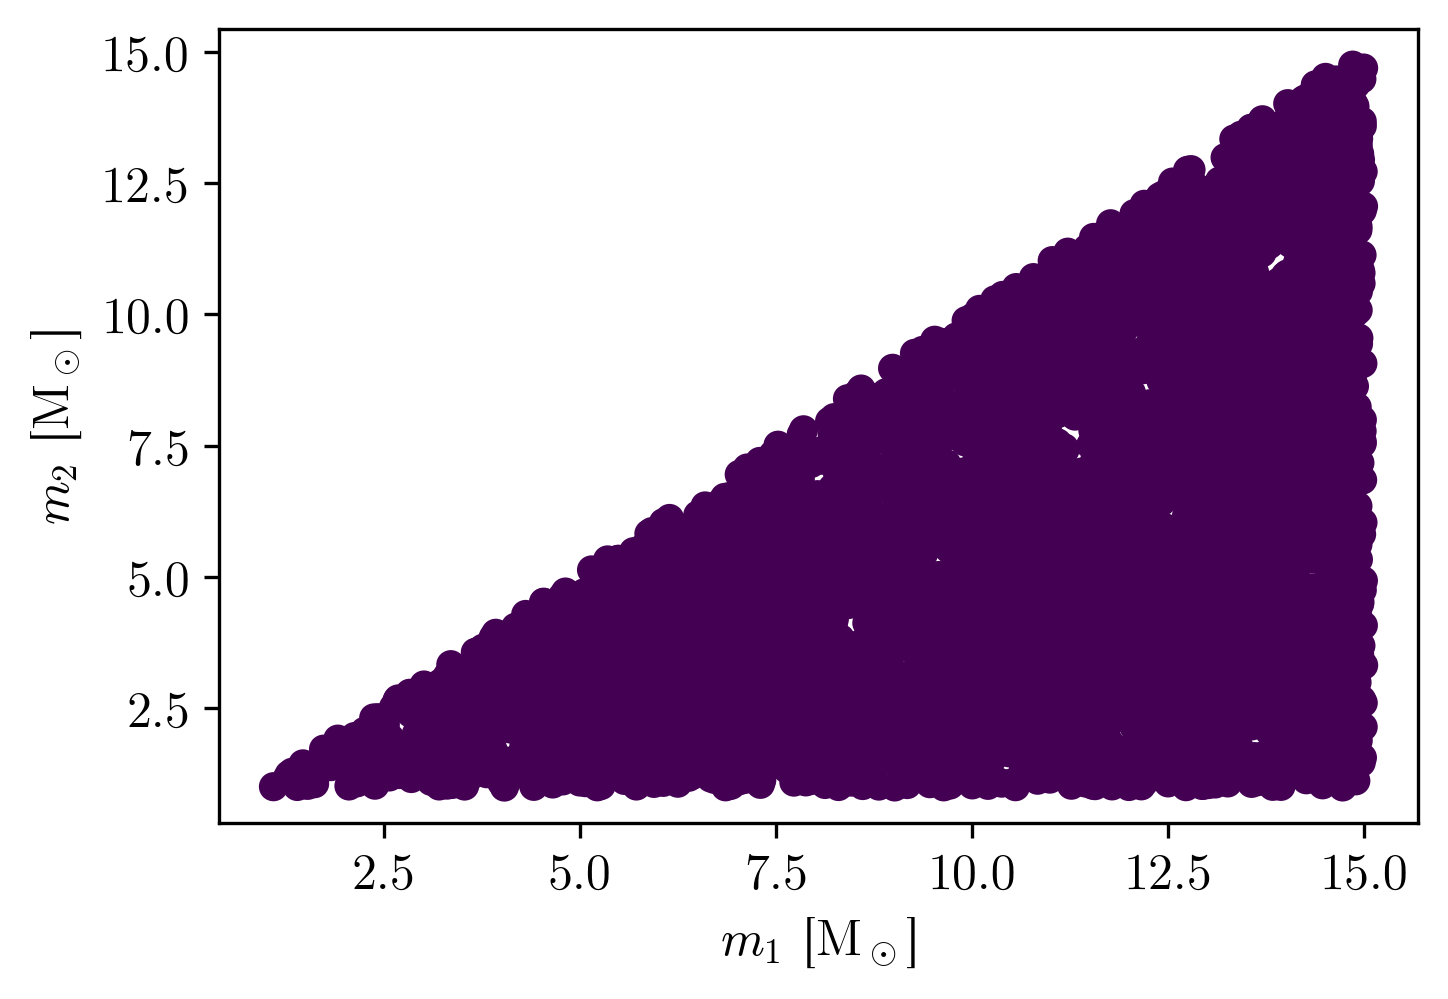

In [27]:
m1_ts = bank.templates[:, 0]
m2_ts = bank.templates[:, 1]
plt.scatter(np.array(m1_ts), np.array(m2_ts), c=np.array(densities))
plt.xlabel(r"$m_1$ [M$_\odot$]")
plt.ylabel(r"$m_2$ [M$_\odot$]")
plt.tight_layout()
plt.savefig(f"{bank.name}.png")

In [52]:
save_bank(bank)

In [52]:
# Check effectualness
from core.utils import get_effectualness

sample = sampler(key, 500)
dists = jnp.sqrt(((bank.templates.reshape([-1, 1, 2]) - sample.reshape([1, -1, 2]))**2).sum(2).min(0))

In [57]:
len(dists[dists < jnp.sqrt(bank.m_star)]) / len(dists)

0.998

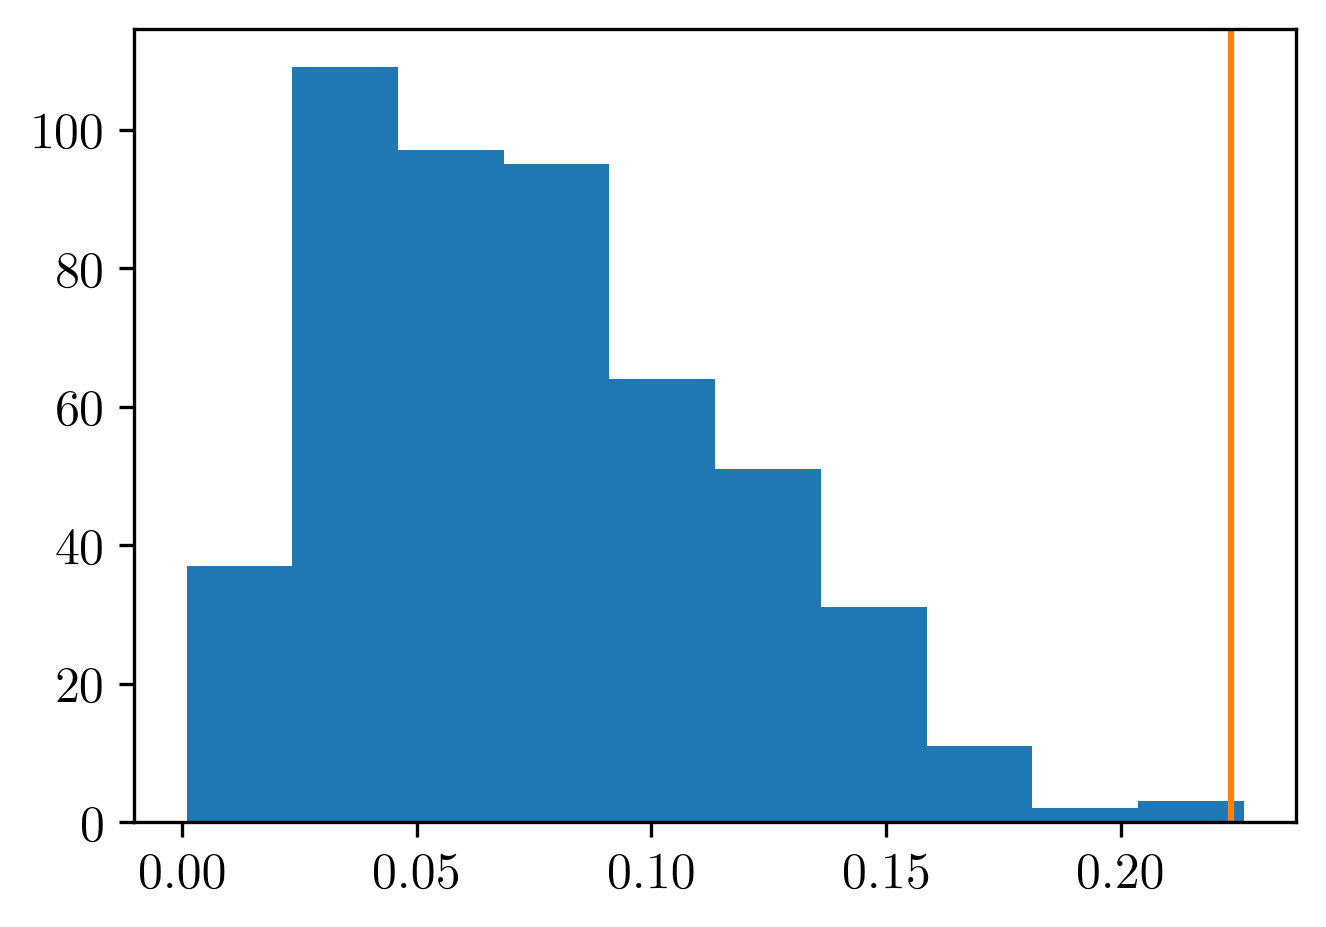

In [53]:
plt.hist(dists)
plt.axvline(jnp.sqrt(bank.m_star), color="C1")

In [1]:
from functools import partial
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import random, jit, vmap

from core.bank import load_bank_dict, Bank, get_bank_effectualnesses
from core.utils import get_m1_m2_sampler, Sn_func, get_effectualness
from core.metric import match
from threePN_simple import Amp_35PN, Psi_35PN

In [2]:
d = load_bank_dict("test-35PN.npz")
m1_range, m2_range = jnp.array([1., 3.]), jnp.array([1., 3.])
sampler = get_m1_m2_sampler(m1_range, m2_range)
bank = Bank(amp=Amp_35PN, Psi=Psi_35PN, sampler=sampler, Sn=Sn_func, **d)

In [3]:
key = random.PRNGKey(130)

In [5]:
effectualnesses = get_bank_effectualnesses(key, bank, 100)

  0%|          | 0/100 [00:00<?, ?it/s]

0.84


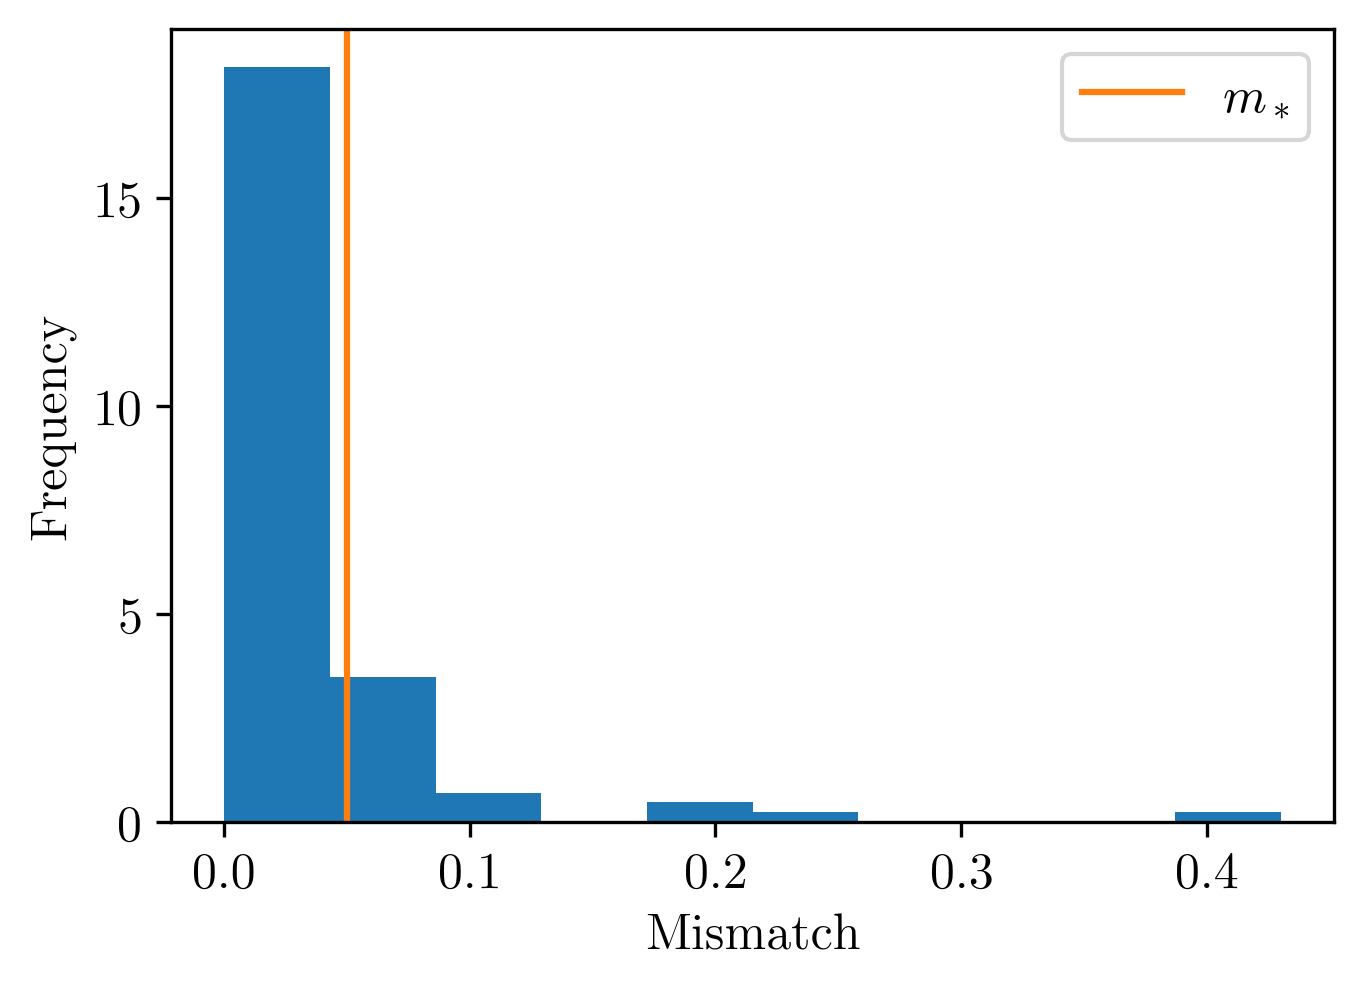

In [21]:
# Compare against minimum mismatch
mismatches = 1 - effectualnesses

plt.hist(mismatches, density=True)
plt.axvline(bank.m_star, color="C1", label=r"$m_*$")
plt.xlabel(r"Mismatch")
plt.ylabel("Frequency")
plt.legend()
print(jnp.sum(mismatches < bank.m_star) / len(mismatches))

0.9642586740537916
0.9771018215189513
0.84 0.999


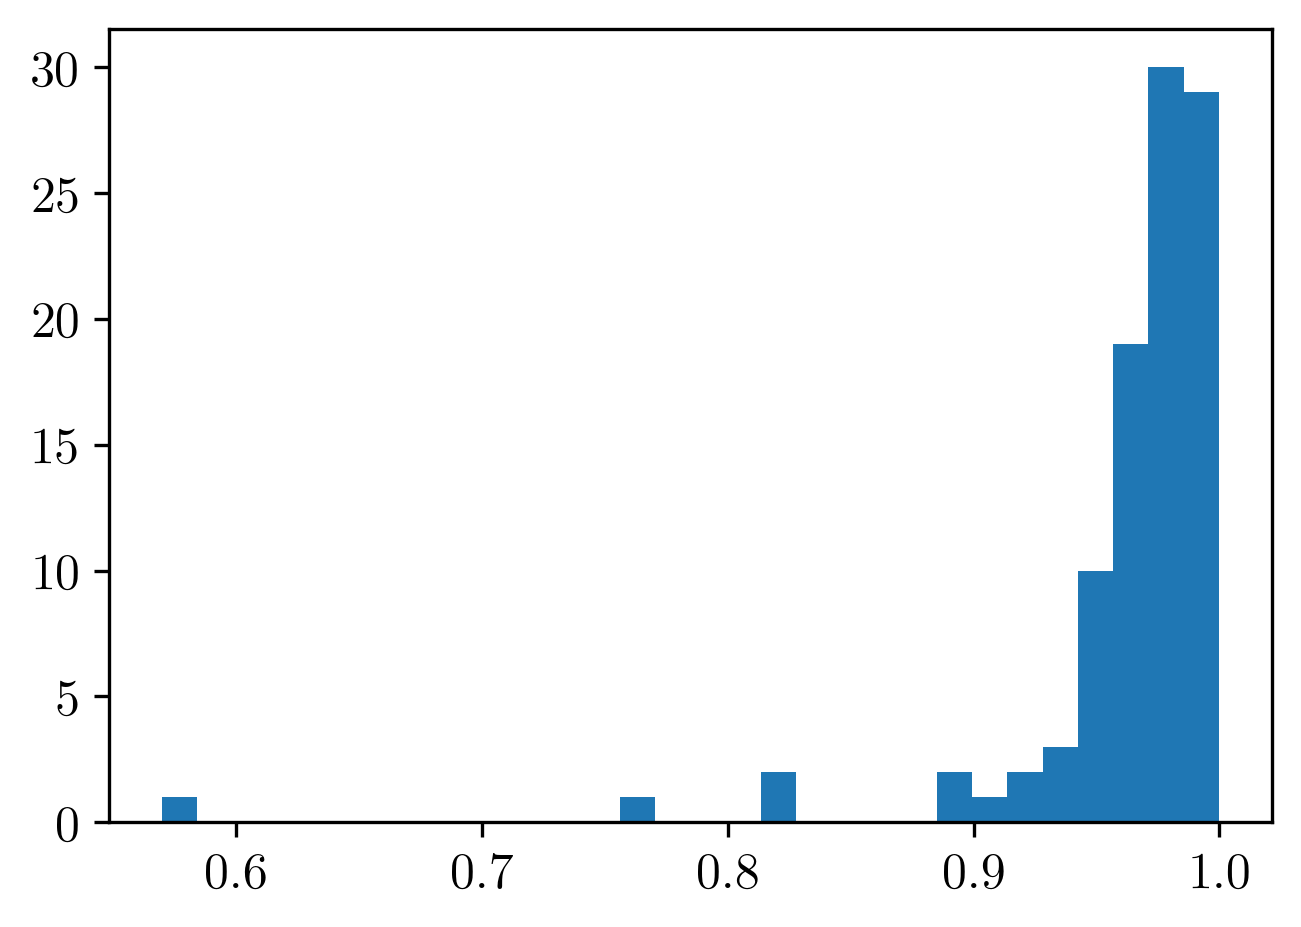

In [14]:
plt.hist(effectualnesses, bins=30);
print(effectualnesses.mean())
print(jnp.median(effectualnesses))
print(len(effectualnesses[effectualnesses > 0.95]) / len(effectualnesses), bank.eta)